# Part of the Project Code
Goal is to get the data in here, cleaned if needed, and usign the correct KEY (company name)

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import cluster
import sklearn
import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy.stats import boxcox

In [293]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

## Upload Contacts Dataset (already cleaned and with essential columns)

In [294]:
Cyber1 = pd.read_csv("Cyber1.csv")
Cyber1.sample(6)

,Record ID,First Name,Last Name,Job Title,Associated Company,Account Name,City,Email,Email Domain,Mobile Phone Number,Employee Count,Lead Status,Lifecycle Stage,HQ Phone Number,Phone Number,List Name,Likelihood to close,LinkedIn Contact Profile URL,Number of Sales Activities,Number of times contacted,Salutation,State/Region,Associated Engagement,Associated Call,Associated Call IDs,Associated Note,Company Name,Contact owner,Contact unworked,"Date entered ""Lead (Lifecycle Stage Pipeline)""","Date entered ""Opportunity (Lifecycle Stage Pipeline)""","Date entered ""Sales Qualified Lead (Lifecycle Stage Pipeline)""","Date exited ""Lead (Lifecycle Stage Pipeline)""",Date of first engagement,Description of first engagement,Direct Phone Number,Email hard bounce reason,ID of first engagement,Last Activity Date,Last Contacted,Last Modified Date,"Latest time in ""Lead (Lifecycle Stage Pipeline)"" (HH:mm:ss)",Lead response time (HH:mm:ss),Time First Seen,Type of first engagement,Updated by user ID,Associated Task,Associated Sales Activity,Links to Sales Task that is based on the Contact (hidden),Associated Company IDs,Associated Engagement IDs,Associated Task IDs,Associated Company IDs.1,Associated Sales Activity IDs,Associated Note IDs,Links to Sales Task that is based on the Contact (hidden)IDs
177,79295634285,Barbara,Carlyle,Owner,Pivot Interiors Inc,CyberHAWKs,Santa Clara,NaN,NaN,(925) 699-3280,208.0,Attempted to Contact,Lead,(408) 432-5600,NaN,CyberHawks Blitz Ian,2.39,https://www.linkedin.com/in/barbara-carlyle-77...,4.0,3.0,"Office furniture solutions provider, 51-200 em...",California,CALL;CALL;NOTE;CALL,Call with Barbara Carlyle;Call with Barbara Ca...,67229537357;67240228773;67321887847,Ted S. - Senior IT Director. ted and Barbara m...,NaN,Ian McDougall,False,2024-11-21 10:48,NaN,NaN,NaN,NaN,NaN,(925) 218-0986,NaN,NaN,2024-12-19 14:33,2024-12-19 14:33,2024-12-19 14:33,NaN,NaN,2024-11-21 10:48,NaN,Luke Perreault,NaN,Call with Barbara Carlyle;Call with Barbara Ca...,NaN,2.617225e+10,67321887847;67229537357;67240922041;67240228773,NaN,2.617225e+10,392096087428;391730839300;391764851573,67240922041,NaN
190,79317385037,Bruce,Ferguson,"Chief Executive Officer, Southern California D...",i-Hire Inc,CyberHAWKs,San Mateo,bruce@i-hire.com,i-hire.com,(310) 990-0044,28.0,Attempted to Contact,Lead,(650) 678-2808,NaN,CyberHawks Blitz Cole,2.32,NaN,9.0,8.0,Job recruitment and hiring services; employee ...,California,CALL;CALL;CALL;CALL;CALL;CALL;CALL;CALL;NOTE,Call with Bruce Ferguson;Call with Bruce Fergu...,65152981788;66480355506;66480509457;6657425337...,https://www.linkedin.com/sales/company/50776 n...,i-Hire Inc,Cole Ragusa,False,2024-11-21 10:52,NaN,NaN,NaN,2024-11-21 17:24,Completed,(949) 419-6632,NaN,6.515298e+10,2024-12-19 13:40,2024-12-19 13:40,2024-12-19 13:40,NaN,06:31:44,2024-11-21 10:52,Call,Luke Perreault,NaN,Call with Bruce Ferguson;Call with Bruce Fergu...,NaN,2.618407e+10,65152981788;66480355506;66480509457;6657425337...,NaN,2.618407e+10,391739835043;392086418071;391370380966;3917230...,66574589568,NaN
225,79294089228,Richard,Mainz,Owner,Mainz Brady Group,CyberHAWKs,San Mateo,rmainz@mbg.com,mbg.com,(415) 269-0434,48.0,In Progress,Lead,(650) 524-8840,NaN,CyberHawks Blitz Josh,2.32,https://www.linkedin.com/in/richard-mainz-8885a31,5.0,4.0,Staffing and consulting services; approximatel...,California,CALL;CALL;CALL;CALL;NOTE,Call with Richard Mainz;Call with Richard Main...,65155223441;66471768649;65147034964;66474972599,they use Always On IT. they handle all support...,Mainz Brady Group,Joshua Maust,False,2024-11-21 10:54,NaN,NaN,NaN,2024-11-21 16:25,Completed,(650) 524-8841,NaN,6.514703e+10,2024-12-11 15:45,2024-12-11 15:42,2024-12-12 13:15,NaN,05:31:38,2024-11-21 10:54,Call,Luke Perreault,NaN,NaN,NaN,2.616834e+10,65147034964;66471768649;65155223441;6647497259...,NaN,2.616834e+10,NaN,66491126806,NaN
127,79315674926,Mark,Wade,Owner,Wade Law Group,CyberHAWKs,San Jose,NaN,NaN,(205) 240-7559,NaN,NaN,Lead,(855) 656-7590,NaN,CyberHa

In [295]:
# Merge 'First Name' and 'Last Name' into a new column 'Full_Name_Hubspot'
Cyber1['Full_Name_Hubspot'] = Cyber1['First Name'] + ' ' + Cyber1['Last Name']
Cyber1['First_Name_Hubspot'] = Cyber1['First Name']
Cyber1['Last_Name_Hubspot'] = Cyber1['Last Name']

Text(0.5, 1.0, 'Missing Values Heatmap')

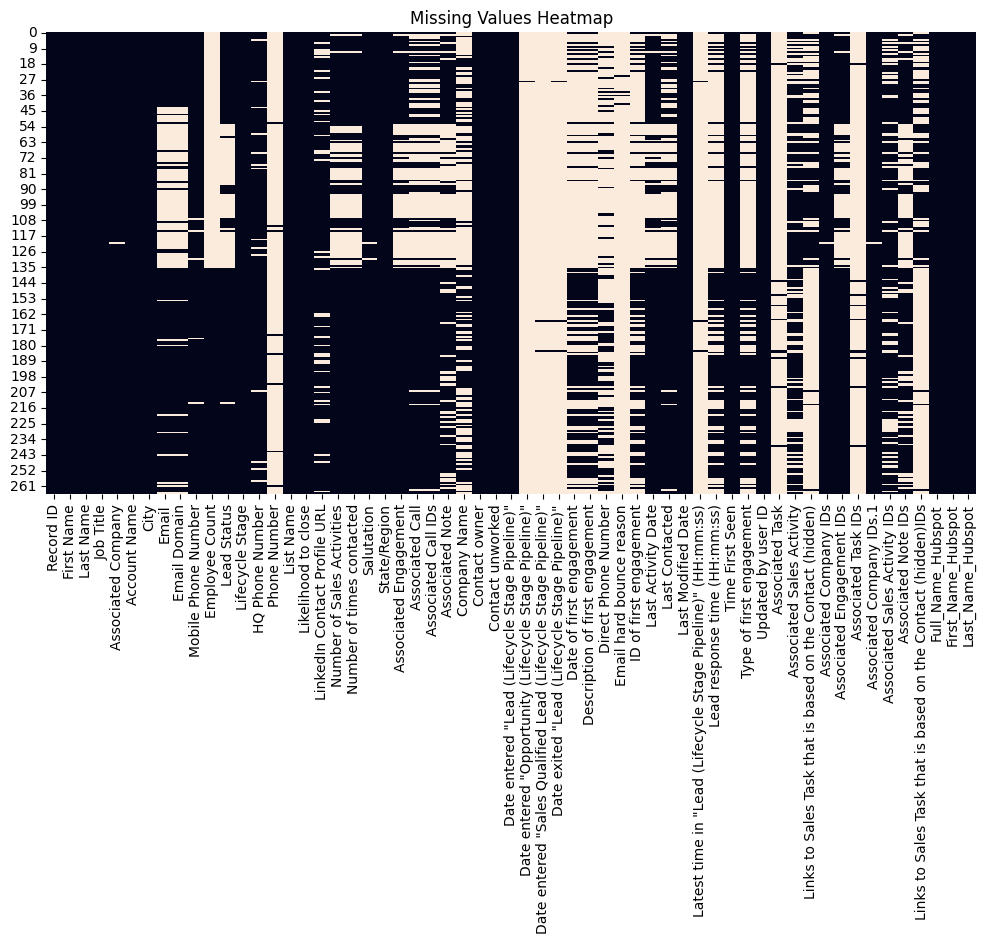

In [296]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(Cyber1.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

## Upload Company Data

In [297]:
Company = pd.read_csv("Cyber_company.csv")
Company.sample(6)

,Record ID,Annual Revenue,City,Company Domain Name,Company name,Description,Facebook Company Page,Industry,Is Public,LinkedIn Bio,LinkedIn Company Page,Logo URL,Number of Associated Contacts,Number of Employees,Postal Code,State/Region,Street Address,Street Address 2,Time Zone,Twitter Handle,Web Technologies,Website URL,Year Founded
244,25807836773,1.000000e+09,San Diego,vistage.com,Vistage Worldwide,Vistage Worldwide is the world's largest execu...,http://www.facebook.com/vistage,Professional Training & Coaching,False,Vistage Worldwide is the world's largest execu...,http://www.linkedin.com/company/vistage,https://logo.clearbit.com/vistage.com,1.0,5000.0,92121,California,4840 Eastgate Mall,NaN,America/Los_Angeles,vistage,Microsoft Exchange Online; Wordpress; Wistia; ...,vistage.com,1957.0
82,26168339858,5.000000e+07,San Mateo,mbg.com,Mainz Brady Group,Mainz Brady Group is a technical staffing firm...,http://www.facebook.com/mainzbradygroup,Human Resources,False,Mainz Brady Group is a technical staffing firm...,http://www.linkedin.com/company/mainz-brady-group,https://na1.hubspot-logos.com/mbg.com,1.0,250.0,94404,California,999 Baker Way Ste 450,750,America/Los_Angeles,mainzbradygroup,Microsoft Exchange Online; Wordpress; Salesfor...,mbg.com,2003.0
177,26171163251,NaN,Redwood City,erp.marketing,ERP Marketing,NaN,NaN,NaN,False,NaN,NaN,NaN,1.0,NaN,94065,California,303 Twin Dolphin Dr,NaN,America/Los_Angeles,NaN,NaN,erp.marketing,NaN
89,26170660969,1.000000e+07,Campbell,ptmasonry.net,PT Masonry,PT Masonry is committed to masonry excellence ...,http://www.facebook.com/pt-masonry-17924161543...,Construction,False,PT Masonry is committed to masonry excellence ...,http://www.linkedin.com/company/pt-masonry,NaN,1.0,50.0,95008,California,150 E Campbell Ave Ste 101,101,America/Los_Angeles,NaN,Typekit By Adobe; Nginx,ptmasonry.net,NaN
105,26178028693,1.000000e+07,Foster City,zlproperties.com,Z&L Properties Inc,"Z&L Properties, Inc. is a California based rea...",NaN,Real Estate,False,"Z&L Properties, Inc. is a California based rea...",http://www.linkedin.com/company/farrokh-&-zohr...,https://na1.hubspot-logos.com/zlproperties.com,1.0,50.0,94404,California,950 Tower Ln Ste 870,f21,America/Los_Angeles,NaN,Microsoft Exchange Online; Microsoft Office 36...,zlproperties.com,2014.0
134,26170351963,5.000000e+07,Mountain View,cavnue.com,Cavnue,Cavnue combines technology and road infrastruc...,http://www.facebook.com/medc,Civil Engineering,False,Cavnue combines technology and road infrastruc...,http://www.linkedin.com/company/cavnue,https://na1.hubspot-logos.com/cavnue.com,1.0,250.0,94041,California,144 S Whisman Rd Ste E,11th floor,America/New_York,cavnue,Typekit By Adobe; Vimeo; Wordpress; Google Tag...,cavnue.com,NaN


Text(0.5, 1.0, 'Missing Values Heatmap')

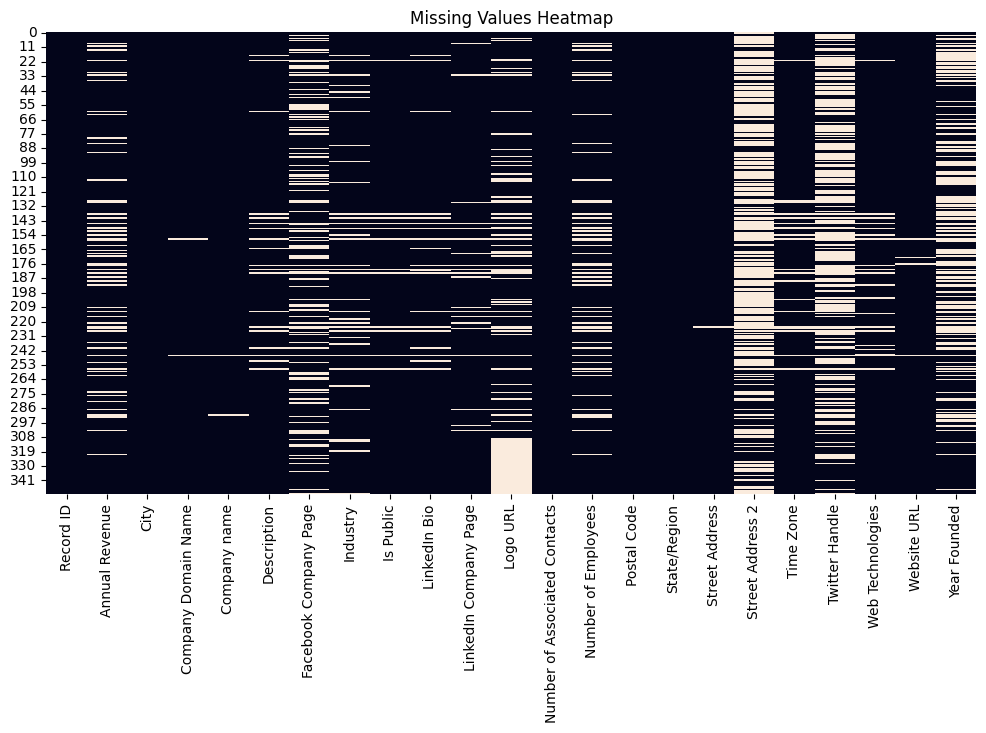

In [298]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(Company.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

### Merge

In [299]:
# Perform the right join
result = pd.merge(
    Company,
    Cyber1,
    left_on="Record ID",
    right_on="Associated Company IDs",
    how="right"
)
result.sample(8)

,Record ID_x,Annual Revenue,City_x,Company Domain Name,Company name,Description,Facebook Company Page,Industry,Is Public,LinkedIn Bio,LinkedIn Company Page,Logo URL,Number of Associated Contacts,Number of Employees,Postal Code,State/Region_x,Street Address,Street Address 2,Time Zone,Twitter Handle,Web Technologies,Website URL,Year Founded,Record ID_y,First Name,Last Name,Job Title,Associated Company,Account Name,City_y,Email,Email Domain,Mobile Phone Number,Employee Count,Lead Status,Lifecycle Stage,HQ Phone Number,Phone Number,List Name,Likelihood to close,LinkedIn Contact Profile URL,Number of Sales Activities,Number of times contacted,Salutation,State/Region_y,Associated Engagement,Associated Call,Associated Call IDs,Associated Note,Company Name,Contact owner,Contact unworked,"Date entered ""Lead (Lifecycle Stage Pipeline)""","Date entered ""Opportunity (Lifecycle Stage Pipeline)""","Date entered ""Sales Qualified Lead (Lifecycle Stage Pipeline)""","Date exited ""Lead (Lifecycle Stage Pipeline)""",Date of first engagement,Description of first engagement,Direct Phone Number,Email hard bounce reason,ID of first engagement,Last Activity Date,Last Contacted,Last Modified Date,"Latest time in ""Lead (Lifecycle Stage Pipeline)"" (HH:mm:ss)",Lead response time (HH:mm:ss),Time First Seen,Type of first engagement,Updated by user ID,Associated Task,Associated Sales Activity,Links to Sales Task that is based on the Contact (hidden),Associated Company IDs,Associated Engagement IDs,Associated Task IDs,Associated Company IDs.1,Associated Sales Activity IDs,Associated Note IDs,Links to Sales Task that is based on the Contact (hidden)IDs,Full_Name_Hubspot,First_Name_Hubspot,Last_Name_Hubspot
4,2.617478e+10,1000000.0,San Jose,classic-glass.net,classic-glass.net,CLASSIC GLASS is a company that specializes in...,NaN,Luxury Goods & Jewelry,False,CLASSIC GLASS is a company that specializes in...,https://www.linkedin.com/company/classic-glass...,NaN,1.0,10.0,95110.0,California,735 Coleman Ave,NaN,America/Los_Angeles,NaN,Microsoft Exchange Online; Microsoft Office 36...,classic-glass.net,NaN,79292077373,Tom,Formosa,President,classic-glass.net,CyberHAWKs,San Jose,tommyformosa@classic-glass.net,classic-glass.net,(408) 293-7606,NaN,In Progress,Lead,NaN,NaN,CyberHawks Blitz Danny,2.32,https://www.linkedin.com/in/tom-formosa-041a6434,2.0,1.0,Manufactures and sells glass products; 50 empl...,California,NOTE;CALL,Call with Tom Formosa,66395304472,not on LI. gatekeeper said they use a family f...,NaN,Daniel Sullivan,False,2024-11-21 10:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-10 14:02,2024-12-10 14:01,2024-12-14 15:49,NaN,NaN,2024-11-21 10:56,NaN,Luke Perreault,NaN,NaN,NaN,2.617478e+10,66395726437;66395304472,NaN,2.617478e+10,NaN,66395726437,NaN,Tom Formosa,Tom,Formosa
185,2.617772e+10,10000000.0,San Mateo,redwoodmortgage.com,Redwood Mortgage Corp,Redwood Mortgage is an established direct lend...,NaN,Real Estate,False,Redwood Mortgage is an established direct lend...,http://www.linkedin.com/company/redwoodmortgage,https://na1.hubspot-logos.com/redwoodmortgage.com,1.0,50.0,94402.0,California,177 Bovet Rd Ste 520,250,America/Los_Angeles,NaN,Microsoft Exchange Online; Nginx; Wordpress; G...,redwoodmortgage.com,1978.0,79295172725,Michael,Burwell,President,Redwood Mortgage Corp,CyberHAWKs,San Mateo,mike@redwoodmortgage.com,redwoodmortgage.com,(650) 804-6185,26.0,Attempted to Contact,Lead,(650) 365-5341,(650) 365-5341 ext. 219,CyberHawks Blitz Cole,2.32,NaN,8.0,7.0,Provides mortgage loans and funding solutions....,California,CALL;NOTE;CALL;CALL;CALL;CALL;CALL;CALL,Call with Michael Burwell;Call with Michael Bu...,66474361405;67207805014;66568879674;6730883696...,no IT managers on LI,Redwood Mortgage Corp,Cole Ragusa,False,2024-11-21 10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-12-19 13:29,2024-12-19 13:29,2024-12-19 13:29,NaN,NaN,2024-11-21 10:52,NaN,Luke Perreault,NaN,Call with Michael Burwell;Call with Michael Bu...,NaN,2.617772e+10,67207805014;66573982219;6

In [300]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 82 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Record ID_x                                                     265 non-null    float64
 1   Annual Revenue                                                  221 non-null    float64
 2   City_x                                                          265 non-null    object 
 3   Company Domain Name                                             264 non-null    object 
 4   Company name                                                    265 non-null    object 
 5   Description                                                     249 non-null    object 
 6   Facebook Company Page                                           186 non-null    object 
 7   Industry                                             

### Now I have combined the company info and the contact info. I have LI company url and LI contact url. employee number, description, Location variables, year founded, facebook page, and some twitter. I can use this for research.

In [301]:
# Specify the filename and file path
file_path = "C:/Users/lukep/Documents/Udemy/Revity/Company_Contact.csv"  # Updated path

# Save the dataset to a CSV file
result.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to C:/Users/lukep/Documents/Udemy/Revity/Company_Contact.csv


# TRANSITION INTO MAKING THE KEYS CORRECT FOR ALL THE INFO

In [302]:
KEY = pd.DataFrame()

In [303]:
KEY['Associated Company'] = Cyber1['Associated Company']
KEY

,Associated Company
0,Foster City Village
1,Landsystems Landscapes
2,UAVOS Inc
3,Proactive IT Consulting Corp
4,classic-glass.net
...,...
261,CommonWealth Central Credit Union
262,Ridge Vineyards
263,Red Herring Inc
264,Dalcon Electric


# Let's add number of IT. 

In [304]:
# this is for just how many IT people there are in a company. 
NumberofIT = pd.read_csv("Cyber CXO Leads - No IT.csv")
NumberofIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company Name     106 non-null    object
 1   IT Contact Name  106 non-null    object
 2   Number_IT        106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


In [305]:
from rapidfuzz import process, fuzz

In [306]:
# Create a function for fuzzy matching
def fuzzy_match(row, choices, scorer=fuzz.token_sort_ratio):
    # Extract the match and score
    result = process.extractOne(row, choices, scorer=scorer)
    if result:  # Check if a match was found
        match, score = result[0], result[1]  # Unpack only the first two elements
        return match if score >= 70 else None  # Adjust threshold as needed
    return None

# Apply fuzzy matching to align keys
KEY["Associated Company1"] = KEY["Associated Company"].apply(
    lambda x: fuzzy_match(x, NumberofIT["Company Name"])
)

# Merge data
result = pd.merge(
    NumberofIT,
    KEY,
    left_on="Company Name",
    right_on="Associated Company1",
    how="right"
)
result.sample(8)
# Drop the fuzzy match helper column if not needed
result = result.drop(columns=["Associated Company1"])

# Display the result
result = result.sort_values(by="Associated Company", ascending=True)
result.head(20)

,Company Name,IT Contact Name,Number_IT,Associated Company
56,NaN,NaN,NaN,A Piece of the Planet Inc
220,A&D Company,Peter Doyle,3-40,A&D Company Ltd
72,NaN,NaN,NaN,A&J Product Solutions
250,NaN,NaN,NaN,AI Fund
176,Accelerance,Santiago Urrego,3-40,Accelerance Inc
259,Aditazz Inc.,Robert Avellan,1-2,Aditazz Inc
90,NaN,NaN,NaN,After School Kids
70,Autonomic,Philip Deutch,3-40,Ai Autonomic LLC
52,NaN,NaN,NaN,All Coverage Insurance Agency
42,NaN,NaN,NaN,All FAB Precision Sheetmetal Inc


In [307]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 56 to 123
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company Name        94 non-null     object
 1   IT Contact Name     94 non-null     object
 2   Number_IT           94 non-null     object
 3   Associated Company  267 non-null    object
dtypes: object(4)
memory usage: 10.5+ KB


In [308]:
nan_counts = result.isna().sum()

# Find the column with the second least NaN count
second_least_nan_col = nan_counts.nsmallest(2).idxmax()

# Drop rows with NaN in that column
df_cleaned = result.dropna(subset=[second_least_nan_col])

print("Column with the second least NaN values:", second_least_nan_col)
print("Cleaned DataFrame:")
df_cleaned.info()

Column with the second least NaN values: Company Name
Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 220 to 139
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company Name        94 non-null     object
 1   IT Contact Name     94 non-null     object
 2   Number_IT           94 non-null     object
 3   Associated Company  94 non-null     object
dtypes: object(4)
memory usage: 3.7+ KB


In [309]:
# Specify the filename and file path
file_path = "C:/Users/lukep/Documents/Udemy/Revity/PBI_has_IT.csv"  # Updated path

# Save the dataset to a CSV file
df_cleaned.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to C:/Users/lukep/Documents/Udemy/Revity/PBI_has_IT.csv


# Merging with all CXO from the 232 LI companies. 

Text(0.5, 1.0, 'Missing Values Heatmap')

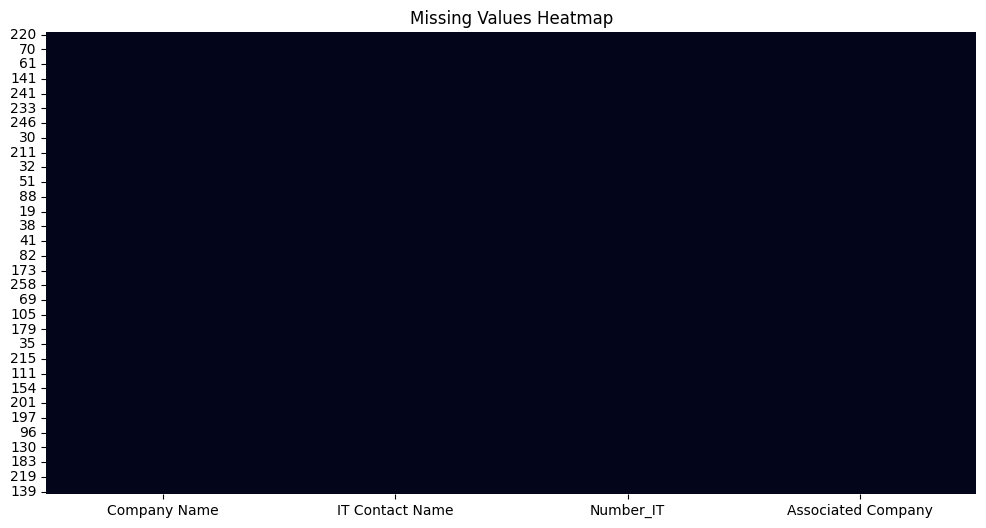

In [310]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

In [311]:
CXO_Contacts = pd.read_excel("LinkedIn_Profiles_Table_Updated1.xlsx", sheet_name="LI_all_CXO")
CXO_Contacts.head(20)

,Name,Company Name,Current Role,Time in Role,Time in Company
0,John Mueller,Brown Investment Group,Affiliate,1 month,1 month
1,Jake Rutsky,Hines,Incoming Summer Analyst,2 months,2 months
2,Shourjo Saha,Wells Fargo,Incoming Investment Banking Summer Analyst,10 months,10 months
3,Laurynas Riliskis,StartX,Founder,1 month,1 month
4,Lily Turndorf,Sigma Delta Tau,Chapter President,3 months,3 months
5,Austin Bosarge,QuSecure,Chief Innovation Officer,2 years 4 months,5 years 5 months
6,Dashiell Brooks,USC Marshall Business Network,President,2 months,1 year
7,Sarah Ucuzoglu,TAMID Group,Director of Consulting,1 month,1 year
8,Santosh Pandipati,Santa Clara County Medical Association,2025 President-Elect,1 month,3 years 6 months
9,Paige Morihara,Santa Clara University,Club President,3 months,9 months


In [312]:
CXO_Contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             448 non-null    object
 1   Company Name     446 non-null    object
 2   Current Role     447 non-null    object
 3   Time in Role     435 non-null    object
 4   Time in Company  435 non-null    object
dtypes: object(5)
memory usage: 17.6+ KB


This is how many observations are missing with a regular merge but below will get some that should merge but the letters are slightly off.

In [313]:
# Create a function for fuzzy matching
def fuzzy_match(row, choices, scorer=fuzz.token_sort_ratio):
    # Extract the match and score
    result = process.extractOne(row, choices, scorer=scorer)
    if result:  # Check if a match was found
        match, score = result[0], result[1]  # Unpack only the first two elements
        return match if score >= 80 else None  # Adjust threshold as needed
    return None

# Apply fuzzy matching to align keys
KEY["Associated Company1"] = KEY["Associated Company"].apply(
    lambda x: fuzzy_match(x, CXO_Contacts["Company Name"])
)

# Merge data
result = pd.merge(
    CXO_Contacts,
    KEY,
    left_on="Company Name",
    right_on="Associated Company1",
    how="right"
)
result.sample(8)
# Drop the fuzzy match helper column if not needed
result = result.drop(columns=["Associated Company1"])

# Display the result
result = result.sort_values(by="Associated Company", ascending=True)
result.head(20)

,Name,Company Name,Current Role,Time in Role,Time in Company,Associated Company
112,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,A Piece of the Planet Inc
111,Here's the table with the First Name and Last ...,NaN,NaN,NaN,NaN,A Piece of the Planet Inc
596,Joaquin Rodriguez,A&D Company,Chief Financial Officer,1 year 8 months,1 year 8 months,A&D Company Ltd
595,Paul Huber,A&D Company,President and CEO,NaN,NaN,A&D Company Ltd
142,Here's the table with the First Name and Last ...,NaN,NaN,NaN,NaN,A&J Product Solutions
143,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,A&J Product Solutions
639,"Tal Schwartz, Ph.D.",Ai Funds,Founder & CEO,6 years 8 months,6 years 8 months,AI Fund
431,Andy Hilliard,"Accelerance, Inc.",CEO,15 years 2 months,15 years 2 months,Accelerance Inc
655,Deepak Aatresh,Aditazz Inc.,Co-Founder & CEO,16 years,16 years,Aditazz Inc
176,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,After School Kids


In [314]:
# Drop rows where the 'Name' column contains "Here's the table"
filtered_result = result[~result['Name'].str.contains("the table", na=False)]

In [315]:
filtered_result.sample(20)

,Name,Company Name,Current Role,Time in Role,Time in Company,Associated Company
643,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,MedExperthealth
50,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,SouthBay Research Inc
634,Gopal Aggarwal,Gordon Prill,CEO,34 years 1 month,34 years 1 month,Gordon Prill Inc
163,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,Camico
541,Pramod John,StartX,Mentor,7 years 11 months,7 years 11 months,StartX
571,Faye Pairman,PsiQuantum,Board Member,6 years,6 years,PsiQuantum Corp
529,Bruce Chen,StartX,Founder/CEO,1 year,1 year,StartX
19,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,Pacific Bay Masonry Inc
327,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,SPInternational
364,Kevin Lundquist,NaN,Chief Financial Officer,NaN,NaN,SC Builders Inc


In [316]:
filtered_results = filtered_result.dropna(subset=['Company Name'])

In [317]:
# Count how many rows from CXO_Contacts didn't merge by checking for NaN values in columns from CXO_Contacts
# These columns will be from the left DataFrame (CXO_Contacts) and would contain NaN if no match is found
unmerged_count = result[result["Company Name"].isna()].shape[0]

# Print the result
print(f"Number of observations from CXO_Contacts that didn't merge: {unmerged_count}")


Number of observations from CXO_Contacts that didn't merge: 320


Text(0.5, 1.0, 'Missing Values Heatmap')

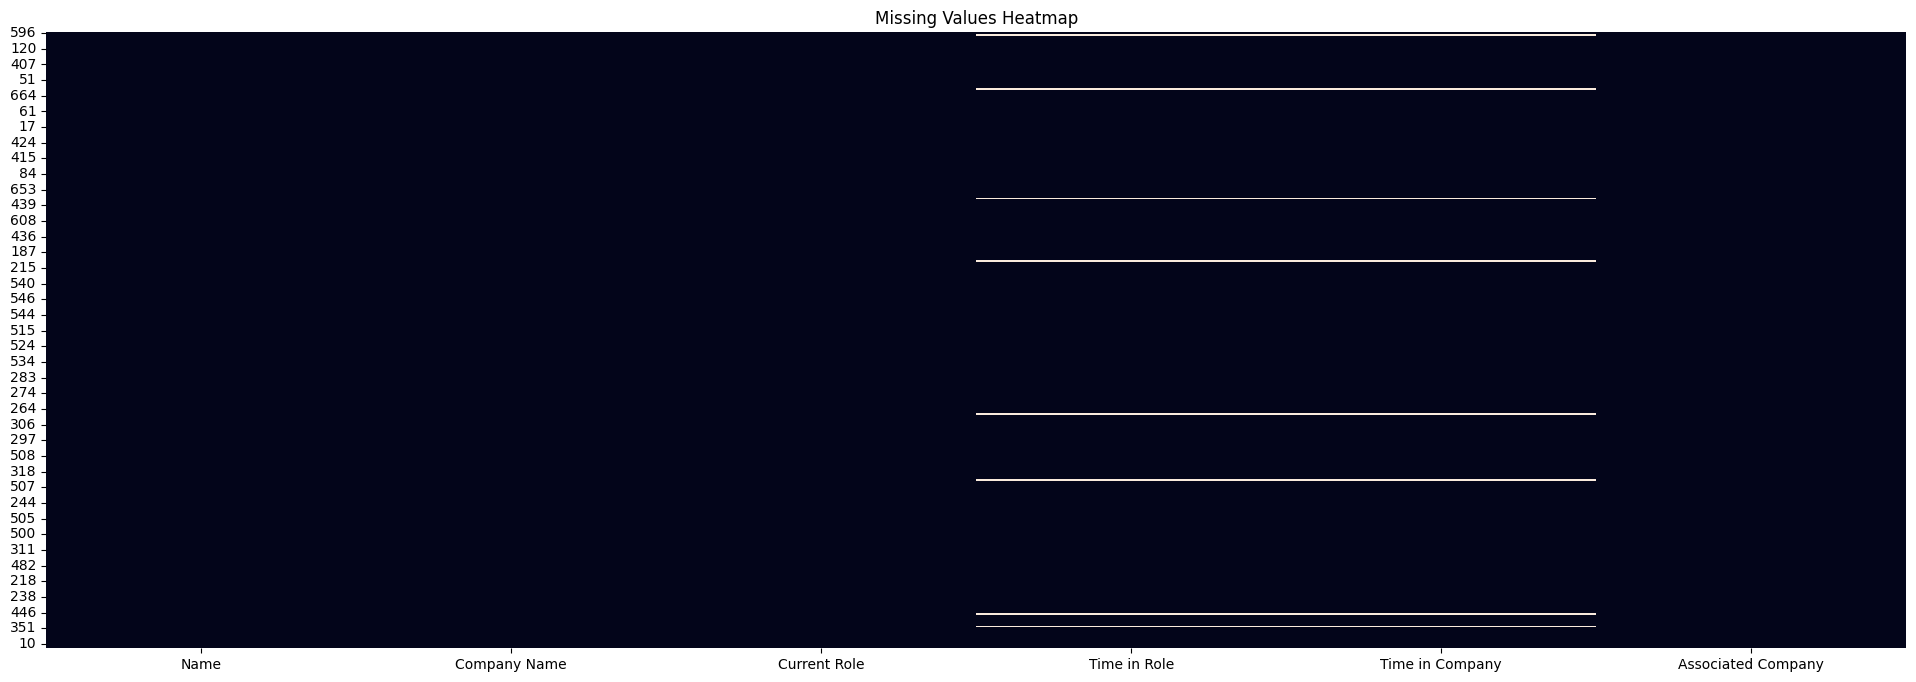

In [343]:
import seaborn as sns
plt.figure(figsize=(24, 8))
sns.heatmap(filtered_results.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

In [344]:
# Specify the filename and file path
file_path = "C:/Users/lukep/Documents/Udemy/Revity/PBI_CXO.csv"  # Updated path

# Save the dataset to a CSV file
filtered_results.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to C:/Users/lukep/Documents/Udemy/Revity/PBI_CXO.csv


## Now I have my original company list but for companies with LI I have there CXO's info minus Phone Number rn. 

## Now I have a dataset adding if they have any IT people, 1-2 IT peope, or 3- 40 IT people. 

In [ ]:
Added_IT = pd.read_excel("LinkedIn_Profiles_Table_Updated1.xlsx", sheet_name="LI_added_IT") 

Added_IT.sample(6)

,Name,Company,Role,Time in Role,Time in Company
17,Sean Hayden,Santa Clara University,Network Student Technician,2 months,2 months
69,"Angela Kaiser, DNP",AONL Credentialing Committee,Appointed Chair for 2025,2 months,2 months
44,Michael Iino,Raise Commercial Real Estate,President,6 years,6 years
37,Ethan Del Val Perez,ALPFA - University of Minnesota,Founding Corporate Relations Officer,1 year,1 year
20,Kiran Tarate,VitaWerks,Senior Analyst - Business Operations,1 month,1 month
66,"Arthur Keller, Ph.D.",Exir Bio,President,3 months,3 months


In [321]:
Added_IT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             70 non-null     object
 1   Company          70 non-null     object
 2   Role             70 non-null     object
 3   Time in Role     70 non-null     object
 4   Time in Company  70 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [322]:
# Create a function for fuzzy matching
def fuzzy_match(row, choices, scorer=fuzz.token_sort_ratio):
    # Extract the match and score
    result = process.extractOne(row, choices, scorer=scorer)
    if result:  # Check if a match was found
        match, score = result[0], result[1]  # Unpack only the first two elements
        return match if score >= 67 else None  # Adjust threshold as needed
    return None

# Apply fuzzy matching to align keys
KEY["Associated Company1"] = KEY["Associated Company"].apply(
    lambda x: fuzzy_match(x, Added_IT["Company"])
)

# Merge data
result = pd.merge(
    Added_IT,
    KEY,
    left_on="Company",
    right_on="Associated Company1",
    how="right"
)
result.sample(8)
# Drop the fuzzy match helper column if not needed
result = result.drop(columns=["Associated Company1"])

# Display the result
result = result.sort_values(by="Company", ascending=True)
result.head(20)

,Name,Company,Role,Time in Role,Time in Company,Associated Company
77,Tyler Sjogren,Applied Physics Systems,Senior Technical Coordinator,7 years 8 months,7 years 8 months,Applied Physics Systems Inc
43,Sana Majid Lotia,Fluence,Business Transformation and Competitiveness Wo...,3 months,9 months,Fluence Inc
78,Sana Majid Lotia,Fluence,Business Transformation and Competitiveness Wo...,3 months,9 months,Fluence Inc
124,Anthony Soohoo,MoneyGram International,Chairman and CEO,3 months,3 months,SPInternational
90,Austin Bosarge,QuSecure,Chief Financial Officer,2 months,2 months,QuSecure Inc
114,"Santosh Pandipati, MD, FACOG",Santa Clara County Medical Association,2025 President-Elect,1 month,1 month,Santa Clara County Medical Association
130,Michelle Tombu,Scholars of Finance,President,1 month,3 years,Scholars of Finance
247,Kiran Tarate,VitaWerks,Senior Analyst - Business Operations,1 month,1 month,Vitawerks Inc
164,Michelle Johnson,VitalConnect,Senior Account Manager,2 months,2 months,VitalConnect Inc
110,Essam Sleiman,Y Combinator,F24,4 months,4 months,NUMI (Y Combinator)


In [323]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 77 to 265
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                10 non-null     object
 1   Company             10 non-null     object
 2   Role                10 non-null     object
 3   Time in Role        10 non-null     object
 4   Time in Company     10 non-null     object
 5   Associated Company  265 non-null    object
dtypes: object(6)
memory usage: 14.5+ KB


In [324]:
nan_counts = result.isna().sum()

# Find the column with the second least NaN count
second_least_nan_col = nan_counts.nsmallest(2).idxmax()

# Drop rows with NaN in that column
df_cleaned = result.dropna(subset=[second_least_nan_col])

print("Column with the second least NaN values:", second_least_nan_col)
print("Cleaned DataFrame:")
df_cleaned.info()

Column with the second least NaN values: Name
Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 77 to 110
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                10 non-null     object
 1   Company             10 non-null     object
 2   Role                10 non-null     object
 3   Time in Role        10 non-null     object
 4   Time in Company     10 non-null     object
 5   Associated Company  10 non-null     object
dtypes: object(6)
memory usage: 560.0+ bytes


In [325]:
file_path = "C:/Users/lukep/Documents/Udemy/Revity/PBI_NEW_IT.csv"  # Updated path

# Save the dataset to a CSV file
df_cleaned.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to C:/Users/lukep/Documents/Udemy/Revity/PBI_NEW_IT.csv


# Merging with News 

## Change the NEWS dataset

In [326]:
#bringing in the data set I want to merge with to find similar people 
# Load the Excel file and specify the sheet name
News = pd.read_excel("LinkedIn_Profiles_Table_Updated1.xlsx", sheet_name="LI_News")

News.sample(6)

,Name,Business Name,Date,Article Description,Link
5,Stuart Oda,Alesca Life,2024-11-25,Alesca Life partnered with UAE's Crysp Farms t...,Vertical Farm Daily
2,Michael Sonnenshein,Securitize,2024-12-12,"Securitize appointed Michael Sonnenshein, form...",PR Newswire
12,Melissa-Ann Chan,Arta Finance Wealth Management LLC,2024-12-20,Arta Finance Expands: Melissa-Ann Chan announc...,Business Insider
10,Maren Bannon,January Ventures,2024-12-12,January Ventures' Fund for Women: Maren Bannon...,TechCrunch
6,Asheem Chandna,Greylock,2024-12-09,Greylock's Investment in Seven AI: Asheem Chan...,TechCrunch
0,Jag Kapoor,"Golden State Restaurants, Inc.",2024-12-12,"Jag Kapoor, along with Jessica Kapoor and Gary...",San Francisco Chronicle


In [327]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 16 non-null     object        
 1   Business Name        16 non-null     object        
 2   Date                 16 non-null     datetime64[ns]
 3   Article Description  16 non-null     object        
 4   Link                 16 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 772.0+ bytes


In [328]:
from rapidfuzz import process, fuzz

In [329]:
KEY = KEY.drop(columns=['Associated Company1'])

In [330]:
# Create a function for fuzzy matching
def fuzzy_match(row, choices, scorer=fuzz.token_sort_ratio):
    # Extract the match and score
    result = process.extractOne(row, choices, scorer=scorer)
    if result:  # Check if a match was found
        match, score = result[0], result[1]  # Unpack only the first two elements
        return match if score >=60 else None  # Adjust threshold as needed
    return None

# Apply fuzzy matching to align keys
KEY["Matched Business Name"] = KEY["Associated Company"].apply(
    lambda x: fuzzy_match(x, News["Business Name"])
)

# Perform the right join
result = pd.merge(
    News,
    KEY,
    left_on="Business Name",
    right_on="Matched Business Name",
    how="right"
)

# Drop the fuzzy match helper column if not needed
result = result.drop(columns=["Matched Business Name"])

# Display the result
result = result.sort_values(by="Business Name", ascending=True)
result.head(10)

,Name,Business Name,Date,Article Description,Link,Associated Company
15,Melissa-Ann Chan,Arta Finance Wealth Management LLC,2024-12-20,Arta Finance Expands: Melissa-Ann Chan announc...,Business Insider,CASCO Property Management LLC
39,Melissa-Ann Chan,Arta Finance Wealth Management LLC,2024-12-20,Arta Finance Expands: Melissa-Ann Chan announc...,Business Insider,Vista Wealth Management LLC
157,Melissa-Ann Chan,Arta Finance Wealth Management LLC,2024-12-20,Arta Finance Expands: Melissa-Ann Chan announc...,Business Insider,Arta Finance Wealth Management LLC
57,Jag Kapoor,"Golden State Restaurants, Inc.",2024-12-12,"Jag Kapoor, along with Jessica Kapoor and Gary...",San Francisco Chronicle,Golden Realty & Investments Inc
38,Alan Zafran,IEQ Capital,2024-12-14,IEQ Capital's Acquisition: Alan Zafran discuss...,Wall Street Journal,IEQ Capital LLC
174,Alan Zafran,IEQ Capital,2024-12-14,IEQ Capital's Acquisition: Alan Zafran discuss...,Wall Street Journal,IEQ Capital LLC
14,Maren Bannon,January Ventures,2024-12-12,January Ventures' Fund for Women: Maren Bannon...,TechCrunch,Pinnacle Ventures
125,Anthony Soohoo,MoneyGram International,2024-10-31,MoneyGram International appointed Anthony Sooh...,FinTech Futures,SPInternational
126,Anthony Soohoo,MoneyGram International,2024-12-09,MoneyGram's Digital Strategy: Anthony Soohoo o...,CNBC,SPInternational
90,Skip Sanzeri,QuSecure,2024-12-04,Skip Sanzeri discussed China's recent quantum ...,Forbes,QuSecure Inc


In [331]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 15 to 267
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 12 non-null     object        
 1   Business Name        12 non-null     object        
 2   Date                 12 non-null     datetime64[ns]
 3   Article Description  12 non-null     object        
 4   Link                 12 non-null     object        
 5   Associated Company   267 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 14.7+ KB


In [332]:
non_matching = News[~News["Business Name"].isin(result["Business Name"].dropna())]
non_matching

,Name,Business Name,Date,Article Description,Link
2,Michael Sonnenshein,Securitize,2024-12-12,"Securitize appointed Michael Sonnenshein, form...",PR Newswire
4,Pieter Gunst,Legal.io,2024-10-15,Legal.io announced its expansion into New York...,Legal.io
5,Stuart Oda,Alesca Life,2024-11-25,Alesca Life partnered with UAE's Crysp Farms t...,Vertical Farm Daily
6,Asheem Chandna,Greylock,2024-12-09,Greylock's Investment in Seven AI: Asheem Chan...,TechCrunch
7,Michael Sonnenshein,Securitize,2024-12-10,Grayscale's Bitcoin ETF Approval: Michael Sonn...,Bloomberg
8,Lisa Coca,AM Batteries,2024-12-15,AM Batteries' Solid-State Tech: Lisa Coca disc...,Reuters
11,Felipe Lamounier,Nubank,2024-12-18,Nubank's AI Advisory Platform: Felipe Lamounie...,Financial Times


In [333]:
nan_counts = result.isna().sum()

# Find the column with the second least NaN count
second_least_nan_col = nan_counts.nsmallest(2).idxmax()

# Drop rows with NaN in that column
df_cleaned = result.dropna(subset=[second_least_nan_col])

print("Column with the second least NaN values:", second_least_nan_col)
print("Cleaned DataFrame:")
df_cleaned.info()

Column with the second least NaN values: Name
Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 15 to 36
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 12 non-null     object        
 1   Business Name        12 non-null     object        
 2   Date                 12 non-null     datetime64[ns]
 3   Article Description  12 non-null     object        
 4   Link                 12 non-null     object        
 5   Associated Company   12 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 672.0+ bytes


In [334]:
file_path = "C:/Users/lukep/Documents/Udemy/Revity/PBI_NEWS.csv"  # Updated path

# Save the dataset to a CSV file
df_cleaned.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to C:/Users/lukep/Documents/Udemy/Revity/PBI_NEWS.csv


# Adding the LI posts

In [335]:
# add the posts
LI_posts = pd.read_excel("LinkedIn_Profiles_Table_Updated1.xlsx", sheet_name="LI_posts")

LI_posts.sample(6)

,Name_Post,Company,Description,Date
31,Brian D. Barlow,Sidewalk Infrastructure Partners (SIP),Shared insights on the future of urban infrast...,2024-12-20
29,Chris Danek,Bessel.co,Discussed the challenges and opportunities in ...,2024-12-21
21,Rob Lloyd,The Picklr,Announced the opening of a new state-of-the-ar...,2024-12-17
15,Touraj Parang,Serve Robotics,Announced a new partnership between Serve Robo...,2024-12-20
14,Chris Neale,The Core Companies,Highlighted the completion of a new affordable...,NaT
24,Michael Evans,Furpeeps Labs,Announced a new initiative focused on developi...,2024-12-21


In [336]:
LI_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name_Post    32 non-null     object        
 1   Company      32 non-null     object        
 2   Description  32 non-null     object        
 3   Date         17 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ KB


In [337]:
# Create a function for fuzzy matching
def fuzzy_match(row, choices, scorer=fuzz.token_sort_ratio):
    # Extract the match and score
    result = process.extractOne(row, choices, scorer=scorer)
    if result:  # Check if a match was found
        match, score = result[0], result[1]  # Unpack only the first two elements
        return match if score >= 70 else None  # Adjust threshold as needed
    return None

# Apply fuzzy matching to align keys
KEY["Matched Business Name"] = KEY["Associated Company"].apply(
    lambda x: fuzzy_match(x, LI_posts["Company"])
)

# Perform the right join
result = pd.merge(
    LI_posts,
    KEY,
    left_on="Company",
    right_on="Matched Business Name",
    how="right"
)

# Drop the fuzzy match helper column if not needed
result = result.drop(columns=["Matched Business Name"])

# Display the result
result = result.sort_values(by="Associated Company", ascending=True)
result.head(10)

,Name_Post,Company,Description,Date,Associated Company
57,NaN,NaN,NaN,NaT,A Piece of the Planet Inc
225,NaN,NaN,NaN,NaT,A&D Company Ltd
73,NaN,NaN,NaN,NaT,A&J Product Solutions
255,NaN,NaN,NaN,NaT,AI Fund
180,Andy Hilliard,"Accelerance, Inc.",Shared insights on the evolving landscape of s...,NaT,Accelerance Inc
264,NaN,NaN,NaN,NaT,Aditazz Inc
92,NaN,NaN,NaN,NaT,After School Kids
71,NaN,NaN,NaN,NaT,Ai Autonomic LLC
53,NaN,NaN,NaN,NaT,All Coverage Insurance Agency
43,NaN,NaN,NaN,NaT,All FAB Precision Sheetmetal Inc


In [338]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 57 to 125
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name_Post           19 non-null     object        
 1   Company             19 non-null     object        
 2   Description         19 non-null     object        
 3   Date                2 non-null      datetime64[ns]
 4   Associated Company  272 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 12.8+ KB


In [339]:
nan_counts = result.isna().sum()

# Find the column with the second least NaN count
second_least_nan_col = nan_counts.nsmallest(2).idxmax()

# Drop rows with NaN in that column
df_cleaned = result.dropna(subset=[second_least_nan_col])

print("Column with the second least NaN values:", second_least_nan_col)
print("Cleaned DataFrame:")
df_cleaned.info()

Column with the second least NaN values: Name_Post
Cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 180 to 209
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name_Post           19 non-null     object        
 1   Company             19 non-null     object        
 2   Description         19 non-null     object        
 3   Date                2 non-null      datetime64[ns]
 4   Associated Company  19 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 912.0+ bytes


Text(0.5, 1.0, 'Missing Values Heatmap')

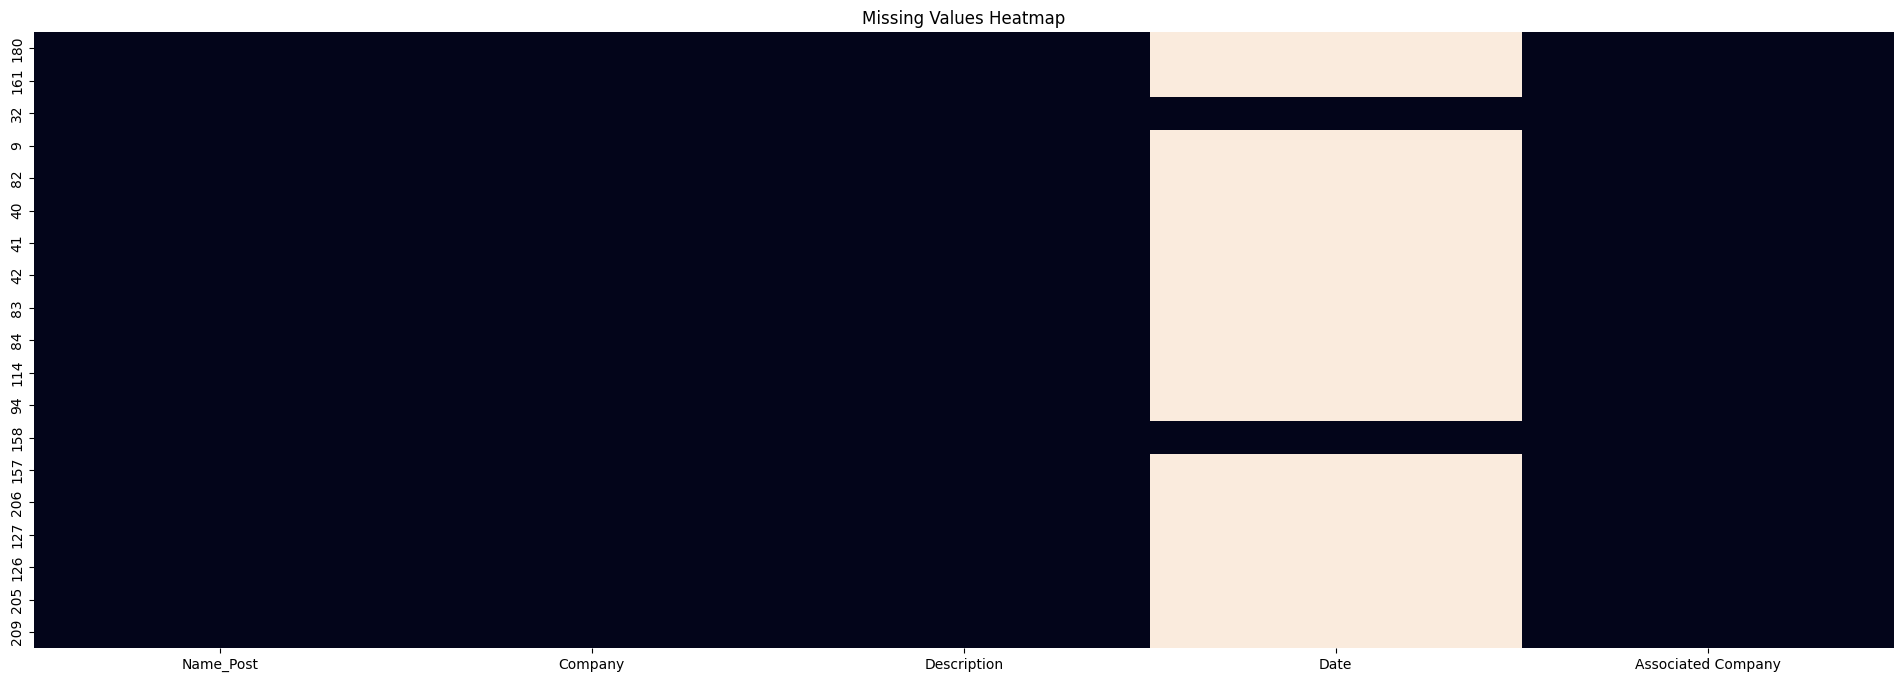

In [340]:
import seaborn as sns
plt.figure(figsize=(24, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False)
plt.title("Missing Values Heatmap")

In [341]:
file_path = "C:/Users/lukep/Documents/Udemy/Revity/PBI_Posts.csv"  # Updated path

# Save the dataset to a CSV file
df_cleaned.to_csv(file_path, index=False)

print(f"Dataset saved to {file_path}")

Dataset saved to C:/Users/lukep/Documents/Udemy/Revity/PBI_Posts.csv
